In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('insurance.csv')

### 1. Display Top 5 Rows of The Dataset

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Display Last 5 Rows of The Dataset

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### 3 . Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
df.shape

(1338, 7)

### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 5. Check Null Values In The Dataset

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
gender,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
Smoking,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000


### Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values

In [14]:
df['gender']=df['sex'].map({'female':0,'male':1})

In [17]:
df['Smoking']=df['smoker'].map({'yes':1,'no':0})

In [18]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
df['Region']=df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender,Smoking,Region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,3
4,32,male,28.880,0,no,northwest,3866.85520,1,0,3


In [25]:
X=df[['age','bmi','children','gender','Smoking','Region']]
y=df['charges']

### 9. Train/Test split
          1. Split data into two-part: a training set and a testing set
          
          2. Train the model(s) on the training set
          
          3. Test the Model(s) on the Testing set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [29]:
X_train

,age,bmi,children,gender,Smoking,Region
560,46,19.950,2,0,0,3
1285,47,24.320,0,0,0,4
1142,52,24.860,0,0,0,2
969,39,34.320,5,0,0,2
486,54,21.470,3,0,0,3
...,...,...,...,...,...,...
1095,18,31.350,4,0,0,4
1130,39,23.870,5,0,0,2
1294,58,25.175,0,1,0,4
860,37,47.600,2,0,1,1


In [71]:
X_train.columns

Index(['age', 'bmi', 'children', 'gender', 'Smoking', 'Region'], dtype='object')

### 10. Import the models

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 11. Model Training

In [42]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

### Prediction on Test Data

In [43]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

In [52]:
df1=pd.DataFrame({'Actual':y_test,"lr":y_pred1,"svm":y_pred2,"rf":y_pred3,"gr":y_pred4})
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11192.229532,11001.128629
887,5272.17580,7116.295018,9492.515425,5287.217235,5840.174656
890,29330.98315,36909.013521,9648.758701,28032.213183,28001.980112
1293,9301.89355,9507.874691,9555.044136,9244.739071,9745.291602
259,33750.29180,27013.350008,9420.421978,34814.877950,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47379.483086,45431.423211
575,12222.89830,11814.555568,9625.431547,12950.410607,12465.025294
535,6067.12675,7638.107736,9504.168517,6644.785891,6974.336525
543,63770.42801,40959.081722,9605.004594,46535.602909,47862.047791


### Compare Performae Visually

In [44]:
import matplotlib.pyplot as plt

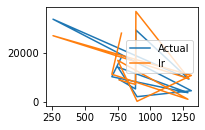

In [55]:
plt.subplot(221)
plt.plot(df1['Actual'][0:11],label="Actual")
plt.plot(df1['lr'][0:11],label="lr")
plt.legend()

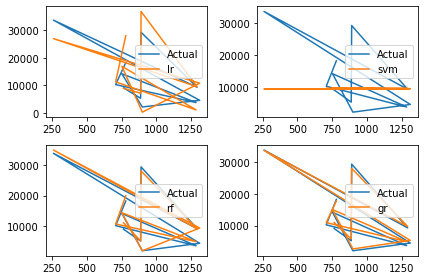

In [58]:
plt.subplot(221)
plt.plot(df1['Actual'][0:11],label="Actual")
plt.plot(df1['lr'][0:11],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'][0:11],label="Actual")
plt.plot(df1['svm'][0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'][0:11],label="Actual")
plt.plot(df1['rf'][0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'][0:11],label="Actual")
plt.plot(df1['gr'][0:11],label="gr")
plt.legend()

plt.tight_layout()

### Evaluating the Algorithm

In [61]:
from sklearn import metrics

In [62]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [67]:
print(score1,'\n',score2,'\n',score3,'\n',score4)

0.7833463107364538 
 -0.07229762787861826 
 0.8620890586931069 
 0.8779726251291786


In [ ]:
# score4 performing well

In [68]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [69]:
print(s1,'\n',s2,'\n',s3,'\n',s4)

4186.508898366436 
 8592.428727899724 
 2489.3106218018356 
 2447.951558054584


In [70]:
#least score s4

### Predict Charges For New Customer

In [109]:
data=[{'age':62, 
      'bmi':39, 
      'children':6, 
      'gender':1,
      'Smoking':1, 
      'Region':3}]

In [110]:
df2=pd.DataFrame.from_dict(data)
df2

,age,bmi,children,gender,Smoking,Region
0,62,39,6,1,1,3


In [111]:
prd1=gr.predict(df2)
prd1

array([56550.57575755])

### Save Model Using Joblib

In [112]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [113]:
import joblib

In [114]:
joblib.dump(gr,'model_insurace')

['model_insurace']

In [115]:
model=joblib.load('model_insurace')

In [116]:
model.predict(df2)

array([56550.57575755])